In [2]:
import pandas
import matplotlib.pyplot
import numpy
import seaborn
import sys
import os
from os.path import join
from scipy import stats
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

First, we will open the csv file and shows its structure.

In [3]:
dataFrame=pandas.read_csv(join("./data", "vgsales.csv"))
dataFrame.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Project Detail

## Dataset

Dataset used in the project is taken from https://www.kaggle.com/gregorut/videogamesales and it is about video game sales around the world. Dataset contains 16598 data points in which each of them has 11 attributes. Attributes and their data types will be introduced in the data preprocessing section.

## Project Description

In this project, we will explore above mentioned dataset about video games as well as perform statistical analysis, hypothesis testing and machine learning techniques on the dataset respectively. Main focus of our whole project will be to explore relationships between attributes of the dataset and exploring ways to relate some of them with others and finally accurately predict category of data points from our learnings.

# Data Preprocessing

We will drop NaN values from the table. After that, we will introduce some columns to the table in order to represent some string columns with their numeric representations.

In [4]:
dataFrame=dataFrame.dropna(axis=0,how='any')
platforms=dict()
genres=dict()
publishers=dict()
pcount=1
gcount=1
pubcount=1
for index,row in dataFrame.iterrows():
    if row['Platform'] not in platforms.keys():
        platforms[row['Platform']]=pcount
        pcount+=1
    if row['Genre'] not in genres.keys():
        genres[row['Genre']]=gcount
        gcount+=1
    if row['Publisher'] not in publishers.keys():
        publishers[row['Publisher']]=pubcount
        pubcount+=1
dataFrame['PlatformNum']=0
dataFrame['GenreNum']=0
dataFrame['PublisherNum']=0
for index, row in dataFrame.iterrows():
    dataFrame.loc[index,'PlatformNum']  = platforms[row['Platform']]
    dataFrame.loc[index,'GenreNum']  = genres[row['Genre']]
    dataFrame.loc[index,'PublisherNum']  = publishers[row['Publisher']]
dataFrame

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,PlatformNum,GenreNum,PublisherNum
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1,1,1
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2,2,1
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,1,3,1
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1,1,1
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,3,4,1
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,3,5,1
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,4,2,1
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,1,6,1
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,1,2,1
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,2,7,1


Now lets call the dtypes method to see the attributes of final dataframe

In [5]:
dataFrame.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
PlatformNum       int64
GenreNum          int64
PublisherNum      int64
dtype: object

At this point, our dataset is ready to work on with no null data and complete numeric representation of each of its attributes except name of each game which is not required to be a numeric data due to lack of representative quality.

# Data Exploration

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


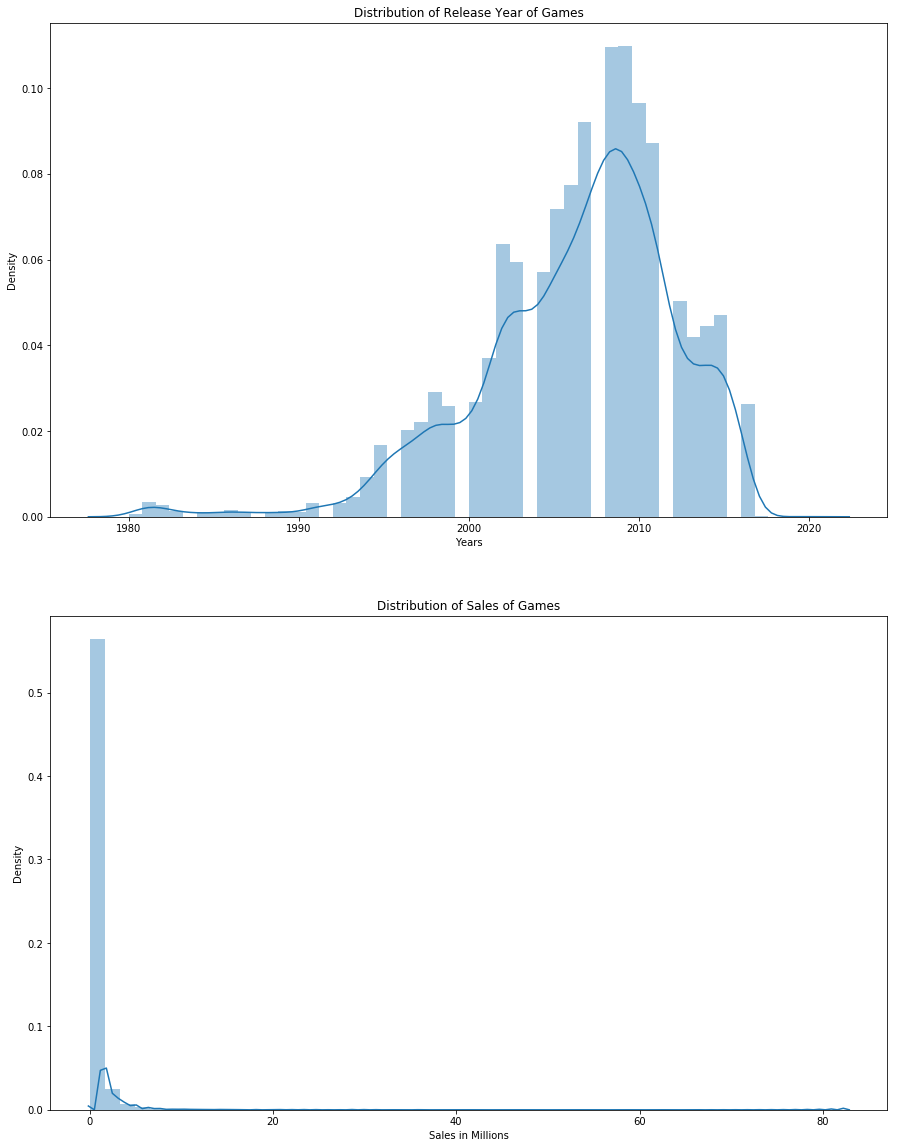

In [6]:
fig=matplotlib.pyplot.figure(figsize=(15,20))
matplotlib.pyplot.subplot(2, 1, 1)
seaborn.distplot(dataFrame["Year"].values, norm_hist=True)
matplotlib.pyplot.title("Distribution of Release Year of Games")
matplotlib.pyplot.xlabel("Years")
matplotlib.pyplot.ylabel("Density")
matplotlib.pyplot.subplot(2, 1, 2)
seaborn.distplot(dataFrame["Global_Sales"].values, norm_hist=True)
matplotlib.pyplot.title("Distribution of Sales of Games")
matplotlib.pyplot.xlabel("Sales in Millions")
matplotlib.pyplot.ylabel("Density")
matplotlib.pyplot.show()


 - When we look at the plot of release years, we can see the imploding point at video game releases. It is convenient that peak point of the sales coincides with the introduction of first smart phone in 2009. After that point, it is safe to assume that mobile phones become more accessible and less risky for game companies to invest and therefore other platforms such as Wii in our dataset took a hit.
 - On the other hand sales graph does not provide much information to us besides the fact that most of the games released only sold in the amount of few millons.

Now we will look at some relations between data attributes and try to deduce as much as we can from the graphs.

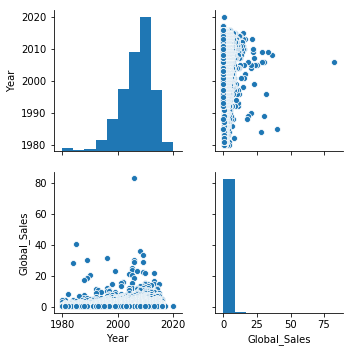

In [7]:
seaborn.pairplot(data=dataFrame, vars=["Year","Global_Sales"])
matplotlib.pyplot.show()

This pairplot between Year and Global Sales attribute shows us that these two attributes are not much related. Even though highest sales also coincides with the peak year for game releases, this can only show us statistical relation. It is arguably sample size bias. We can see that by looking at the number of high global sales in around 90s. Even though 90s are the least productive era of game releases, it has couple of hit games appearantly.

Similar to other industries, video game companies as well as video game platforms have peak times. Now, lets look at following plots and try to deduce which platforms dominated which years. But first, lets remember platform codes with the following.

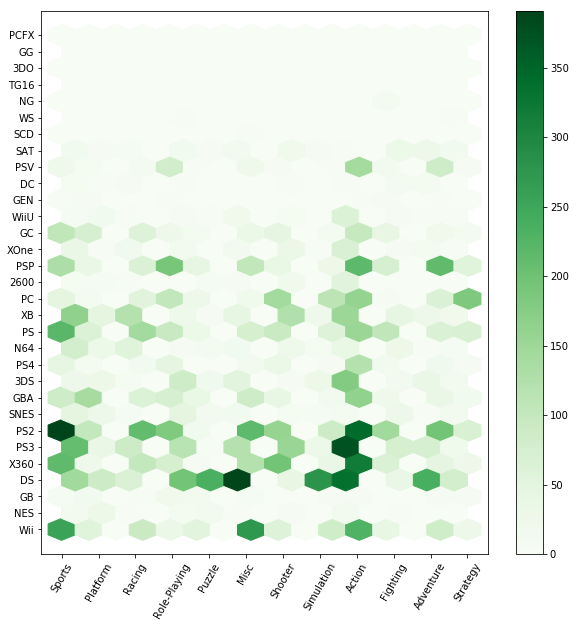

In [8]:
platformNames=[]
genreNames=[]
for key in platforms:
    platformNames.append(str(key))
for key in genres:
    genreNames.append(str(key))
fig=matplotlib.pyplot.figure(figsize=(10,10))
matplotlib.pyplot.hexbin(dataFrame['GenreNum'].values, dataFrame['PlatformNum'].values , gridsize=(15,15),cmap=matplotlib.pyplot.cm.Greens )
matplotlib.pyplot.colorbar()
matplotlib.pyplot.xticks(numpy.arange(1, len(genreNames)+1, step=1),genreNames,rotation=60)
matplotlib.pyplot.yticks(numpy.arange(1, len(platformNames)+1, step=1),platformNames)
matplotlib.pyplot.show()


 - Action games are released more than any other genre.
 - PS2, PS3, XBOX 360 and Nintendo DS are the platforms that has most number of games that can be played on.
 - Except for Action genre and above mentioned platforms, there is no visible pattern in the data. This can mean that our observations are heavily affected by some outliers in the data.  

# Hypothesis Testing

In this section, we will perform some hypothesis testing operations to explore our dataset even more. Selection of hypothesis and related attributes will be arbitary.

We think that political tension all over the world is affecting video game genre selections as well as it affects every possible cultural aspect. For this reason, we will test the following hypothesis: "After the year of 2001 (Terorist attack to US), Action and Shooter genres have more average sales compared to their average sales before."

For this hypothesis, we define following sets:
K : Sales of action and shooter genre video games after the year 2001(exclusive)
L : Sales of action and shooter genre video games before the year 2001(exclusive)
Thus, our hypothesis becomes
 - $H_0 : \mu_K = \mu_L$
 - $H_1 : \mu_K > \mu_L$

At first, we need to find data points for both sets.

In [22]:
K=dataFrame[(dataFrame["Year"]>2001) & ((dataFrame['Genre']=='Action') | (dataFrame['Genre']=='Shooter'))]['Global_Sales']
K

16       21.40
17       20.81
23       16.38
24       16.15
29       14.76
31       14.64
33       14.24
34       14.03
35       13.73
36       13.51
37       13.46
40       12.73
43       12.14
44       11.98
45       11.90
51       11.02
55       10.69
56       10.57
61       10.21
62        9.88
65        9.76
67        9.59
70        9.32
79        8.49
82        8.24
90        7.72
92        7.67
93        7.60
98        7.37
99        7.34
         ...  
16450     0.01
16452     0.01
16453     0.01
16458     0.01
16460     0.01
16472     0.01
16475     0.01
16476     0.01
16477     0.01
16485     0.01
16495     0.01
16499     0.01
16501     0.01
16509     0.01
16517     0.01
16529     0.01
16531     0.01
16533     0.01
16535     0.01
16537     0.01
16546     0.01
16548     0.01
16550     0.01
16564     0.01
16567     0.01
16569     0.01
16577     0.01
16585     0.01
16589     0.01
16594     0.01
Name: Global_Sales, Length: 3971, dtype: float64

In [23]:
L=dataFrame[(dataFrame["Year"]<=2001) & ((dataFrame['Genre']=='Action') | (dataFrame['Genre']=='Shooter'))]['Global_Sales']
L

9        28.31
38       13.10
84        8.09
94        7.60
127       6.51
129       6.43
138       6.27
142       6.05
145       6.03
151       5.82
178       5.24
201       5.05
223       4.73
229       4.63
231       4.61
258       4.31
276       4.17
278       4.16
281       4.12
296       4.03
318       3.83
325       3.77
330       3.73
332       3.72
353       3.61
356       3.60
362       3.54
363       3.53
367       3.52
374       3.50
         ...  
14462     0.03
14475     0.03
14493     0.03
14518     0.03
14560     0.03
14592     0.03
14599     0.03
14661     0.03
14741     0.03
14786     0.03
14804     0.03
14893     0.03
14898     0.03
15088     0.02
15139     0.02
15185     0.02
15244     0.02
15382     0.02
15505     0.02
15535     0.02
15540     0.02
15628     0.02
15761     0.02
15791     0.02
15867     0.02
16135     0.01
16195     0.01
16549     0.01
16582     0.01
16583     0.01
Name: Global_Sales, Length: 562, dtype: float64

Now, lets see their distribution on a plot

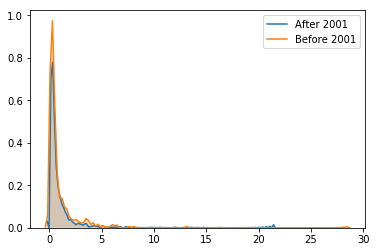

In [26]:
ax = seaborn.kdeplot(K.rename('After 2001'), shade=True)
seaborn.kdeplot(L.rename('Before 2001'), ax=ax, shade=True)
matplotlib.pyplot.show()

Now, with the 0.05 significance level, we call the difference between means hypothesis testing function

In [27]:
t, p = stats.ttest_ind(a=K.values, b=L.values, equal_var=False)
print("T-statistşic is ", t)
print("P-value is, ", p)

T-statistşic is  -2.773132477189671
P-value is,  0.0057087266959941815


We can reject the null hypothesis however, t-statistic is negative. Meaning that we sales after 2001 appears to be lowered compared to the value before 2001. Meaning that our hypothesis is not valid.

# Regression Analysis

In this section, we will look at the correlation among NA Sales and EU Sales. As we said earlier, they should be increasing and decreasing together with strong correlation coefficient.

In [29]:
a, b, correlation, p, sigma = stats.linregress(dataFrame['NA_Sales'],dataFrame['EU_Sales'])
print("Slope is ",a)
print("Intercept is ", b)
print("Correlation is ", correlation)

Slope is  0.47616662965288575
Intercept is  0.021239180233422694
Correlation is  0.768922992756561


As we can see correlation coefficient is high. This means two variables are very correlated. Now lets see on a graph. To do this we will create a sample.

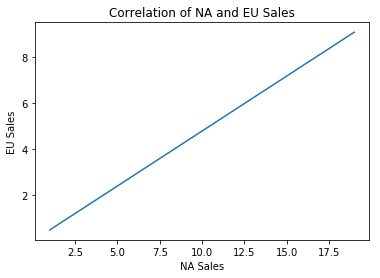

In [32]:
x_vals=[i for i in range(1,20)]
y_vals=[a*i+b for i in x_vals]
matplotlib.pyplot.plot(x_vals,y_vals)
matplotlib.pyplot.xlabel("NA Sales")
matplotlib.pyplot.ylabel("EU Sales")
matplotlib.pyplot.title("Correlation of NA and EU Sales")
matplotlib.pyplot.show()

# Machine Learning

As machine learning algorithms, we have chosen Support Vector Machine and Naive Bayes. We will classify our data by genres.

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

In [46]:
Classes=dataFrame['GenreNum'].values
Features=dataFrame.drop(['GenreNum','Genre','Name','Platform','Publisher'],axis=1).values

## Support Vector Machine

In [47]:
X_train, X_test, y_train, y_test = train_test_split(Features, Classes, test_size=0.33, random_state=42)
clf = SVC(kernel="rbf")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy is ",accuracy_score(y_test, y_pred))
print("F1 score is ",f1_score(y_test, y_pred,average='weighted'))

Accuracy is  0.20159940487260555
F1 score is  0.07560120837029409


## Naive Bayes

In [49]:
clf = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(Features, Classes, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy is ",accuracy_score(y_test, y_pred))
print("F1 score is ",f1_score(y_test, y_pred,average='weighted'))

Accuracy is  0.13260182257764552
F1 score is  0.0954174405452282


As we can see in the above calculations, both machine learning algorithms work pretty bad on the data. This can mean that attributes in our dataset does not contain sufficient information about the Genre information of games. Maybe adding some other features to the dataset increase the accuracy of the algorithms.